In [16]:
#Progress Proyek PBA | 18-11-2021

In [9]:
#Data analysis
import pandas as pd
import numpy as np
#Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#Modeling
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
# from sklearn_crfsuite import CRF, scorers, metrics
# import sklearn_crfsuite
# from sklearn_crfsuite import scorers
# from sklearn_crfsuite import metrics
# from sklearn_crfsuite.metrics import flat_classification_report
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import scipy.stats
#import eli5

In [10]:
# df = open("SINGGALANG.tsv")
# read_tsv = csv.reader(df, delimiter="\t")
# for row in read_tsv:
#      print(row)
# df.close()

#df = pd.read_csv('SINGGALANG.csv', encoding="latin1")

df = pd.read_table('SINGGALANG_NEW.tsv', sep='\t')
df

,Word,Tag
0,Ia,O
1,menjabat,O
2,sebagai,O
3,Presiden,O
4,ketiga,O
...,...,...
1048570,1945,O
1048571,",",O
1048572,dia,O
1048573,",",O


In [11]:
df.columns = df.iloc[0]

df = df[1:]

df.columns = ['word','token']

df = df.reset_index(drop=True)

df

,word,token
0,menjabat,O
1,sebagai,O
2,Presiden,O
3,ketiga,O
4,Mesir,Place
...,...,...
1048569,1945,O
1048570,",",O
1048571,dia,O
1048572,",",O


In [12]:
df.shape

(1048574, 2)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   word    1015112 non-null  object
 1   token   1015126 non-null  object
dtypes: object(2)
memory usage: 16.0+ MB


In [14]:
#so we are basically having only those rows where sentence column is not null
data = df[df['word'].notnull()]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   word    1015112 non-null  object
 1   token   1015126 non-null  object
dtypes: object(2)
memory usage: 16.0+ MB


In [16]:
data.head()

,word,token
0,menjabat,O
1,sebagai,O
2,Presiden,O
3,ketiga,O
4,Mesir,Place


In [22]:
# A class to retrieve the sentences from the dataset
class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1.0
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w) for w in zip(s["token"].values.tolist())]
        self.grouped = self.data.groupby("word").apply(agg_func)
        self.sentences = [s for s in self.grouped]
        
    def get_next(self):
        try:
            s = selg.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [23]:
getter = SentenceGetter(data)
sent = getter.get_next()
print(sent)

None


In [24]:
sentences = getter.sentences
print(len(sentences))

80067


In [25]:
largest_sen = max(len(sen) for sen in sentences)
print('biggest sentence has {} words'.format(largest_sen))

biggest sentence has 61447 words


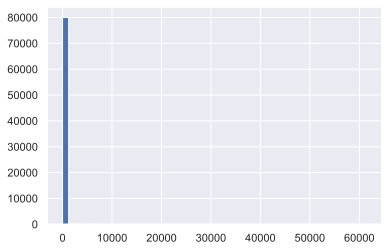

In [26]:
%matplotlib inline
plt.hist([len(sen) for sen in sentences], bins = 50)
plt.show()

In [27]:
max_len = 50
X = [[w[0]for w in s] for s in sentences]
new_X = []
for seq in X:
    new_seq = []
    for i in range(max_len):
        try:
            new_seq.append(seq[i])
        except:
            new_seq.append("PADword")
    new_X.append(new_seq)
new_X[15]

['O',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword']

In [72]:
sentences = getter.sentences
#ths is how a sentence will look like.
print(sentences[1])

[('O',)]


In [73]:
#Lets find the number of words in the dataset
words = list(set(data["word"].values))
n_words = len(words)
print(n_words)

80067


In [74]:
#Lets find the number of words in the dataset
words = list(set(data["token"].values))
n_words = len(words)
print(n_words)

5


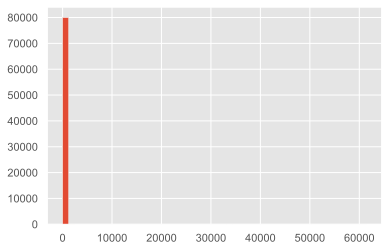

In [75]:
#Lets visualize how the sentences are distributed by their length
plt.style.use("ggplot")
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [76]:
#Lets find out the longest sentence length in the dataset
maxlen = max([len(s) for s in sentences])
print ('Maximum sentence length:', maxlen)

Maximum sentence length: 61447


In [77]:
#Words tagged as B-org
data.loc[data['word'] == 'token'].head()

,word,token
